# Licence


### Python implementation of the following One-Dimensional Optimization Methods

- Successive quadratic estimations
- Newton-Raphson 
- Cuasi Newton
- Bisection
- Secant 

Copyright (C) 2021 Juan Luis Ruiz Vanegas (juanluisruiz971@comunidad.unam.mx)

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see https://www.gnu.org/licenses/.


# 1. Find the optimal solution to the following problem:

$max f(x) = \frac{0.5}{\sqrt{1+x^2}} - \sqrt{1+x^2} (1 - \frac{0.5}{1+x^2}) + x$

## Plotting the function to make a first analysis of the maximum point

In [11]:
from math import sqrt, e

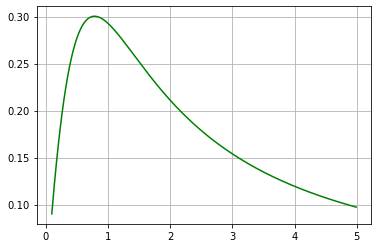

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return ( (0.5/(sqrt(1+x**2))) - (sqrt(1+x**2)) * (1- (0.5/(1+x**2))) +x )

vecfunc = np.vectorize(f)

d = np.arange(0.1, 5.0, 0.01)
T = vecfunc(d)
plt.plot (d, T, 'g')
plt.grid()
plt.show()

## Calculating the derivatives 

In [14]:
from sympy import *
x = Symbol('x')

formule = '(0.5/(sqrt(1+x**2))) - (sqrt(1+x**2)) * (1- (0.5/(1+x**2))) +x '

y = sympify(formule)
f1 = y.diff(x)
f2 = f1.diff(x)
print(f1,"\n\n",f2)

-x*(1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5*x/(x**2 + 1)**(3/2) + 1 

 x**2*(1 - 0.5/(x**2 + 1))/(x**2 + 1)**(3/2) + 3.5*x**2/(x**2 + 1)**(5/2) - (1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5/(x**2 + 1)**(3/2)


## * The following methods assume minimization *

The problem asks us to maximize $f(x)$, so the sign of the objective function must be changed.

- (a) (15 points) Using the successive quadratic estimations method. The input to your program will be: $x_0 = 0$, $\Delta = 0.1$ and $\epsilon_1 = 0.0001$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f(x)$ performed by your program.

In [15]:
def f(x):
    return ( (0.5/(sqrt(1+x**2))) - (sqrt(1+x**2)) * (1- (0.5/(1+x**2))) +x )

def optimo_b(x1,x2,x3, f_x1, f_x2, f_x3):
    a0 = f_x1
    a1 = ( f_x2-f_x1 )/( x2-x1 ) 
    a2 = ( 1/( x3-x2 ) )*( ((f_x3-f_x1)/(x3-x1)) - ((f_x2-f_x1)/(x2-x1) ) )
    
    b = ((x1+x2)/2)-((a1)/(2*a2))
    return (b, f(b))

def successive_quadratic_estimates():
    #x1, delta, epsilon = [float(i) for i in input().split(",")]
    x1, dleta, epsilon = 0, 0.1, 1e-4
    x2 = x1 + delta
    f_x1, f_x2 = f(x1), f(x2)
    
    if ( f_x1 > f_x2 ):
        x3 = x1 + (2*delta)
    else:
        x3 = x1 - delta
    l_aux = [x1,x2,x3]
    l_aux.sort()
    x1, x2, x3 = l_aux[0],l_aux[1],l_aux[2]
    
    
    while( True ):
        f_min, x_min = f(x1), x1
        xb, f_b = optimo_b(x1,x2,x3, f(x1), f(x2), f(x3))
        
        l_aux.append(xb)
        l_aux.sort()
        x1, x2, x3 = l_aux[0],l_aux[1],l_aux[2]
        l_aux.pop()

        
        if ( abs(x_min-xb) < epsilon ):
            break
        
        return (print (xb, f_b))

if __name__=="__main__":
    successive_quadratic_estimates()

NameError: name 'delta' is not defined

NameError: name 'evalF' is not defined

- (b) (15 points) Using the Newton - Raphson method. The input to your program will be: $x_0 = 0$, and $\epsilon_1 = 0.0001$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f^\prime(x)$ performed by your program. In addition, you must include in your report the calculation of the first and second derivative $(f^\prime(x)$ and $f^{\prime\prime}(x))$

In [14]:
def f1(x):
    """
    First derivative of the function. 
    """
    global evalF
    evalF += 1
    
    return - ( -x/sqrt(1 + x**2) - x/(1 + x**2)**(3/2) + 1 ) 

def f(x):
    return ( (0.5/(sqrt(1+x**2))) - (sqrt(1+x**2)) * (1- (0.5/(1+x**2))) +x )

def f2(x):
    
    numerador = (x**2) - 2
    denominador = pow((x**2 + 1), 5/2)
    #return -( ((x**2) - 2)/ (pow((x**2 + 1), 5/2)) )
    return -(numerador/denominador)


def Newton_Raphson():
    #x1, epsilon = [float(i) for i in input().split(",")]
    
    x1, epsilon = 0, 1e-4
    k = 0
    x = [x1]
    f1x = f1(x[k])
    while( abs(f1x) > epsilon ):
        
        x_k_1 = x[k] - (f1x/f2(x[k]))
        x.append(x_k_1)
        k+=1
        f1x = f1(x[k])
    
    return ( print("x* = {0:.3f}\nf(x*) = {1:.3f}\nEvaluations of f'(x) = {2}".format(x_k_1, f(x_k_1), evalF)) )

    
    
    
if __name__=="__main__":
    evalF = 0
    Newton_Raphson()

x* = 0.786
f(x*) = 0.300
Evaluations of f'(x) = 6


- (c) (15 points) Using the Cuasi Newton method. The input to your program will be: $x_0 = 0$, y $\epsilon_1 = 0.0001$ and $\Delta = 0.01$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f(x)$ performed by your program.

In [9]:
def f(x):
    return ( (0.5/(sqrt(1+x**2))) - (sqrt(1+x**2)) * (1- (0.5/(1+x**2))) +x )


def f1(x, delta):
    
    global evalF
    evalF +=1

    numerador = f(x+delta) - f(x-delta)
    denominador =  2*delta
    #return (f(x+delta) - f(x-delta))/2*delta 
    return(numerador/denominador)

def f2(x, delta):
    
    global evalF
    evalF +=1
    numerador = f(x+delta) - (2*f(x)) + f(x-delta)
    denominador = delta**2
    
    #return (f(x+delta) - (2*f(x)) + f(x-delta)/delta**2)
    return(numerador/denominador)

def Cuasi_Newton():
    #x0, epsilon, delta = [float(i) for i in input().split(",")]
    x0, epsilon, delta = 0, 1e-4, 1e-2
    k = 0
    x = [x0]
    f1x = f1(x[k],delta)
    while( abs(f1x) > epsilon ):
        
        x_k_1 = x[k] - (f1x/f2(x[k],delta))
        x.append(x_k_1)
        k+=1
        f1x = f1(x[k],delta)
    
    return ( print("({0:.3f},{1:.3f})\n{2}".format(x_k_1, f(x_k_1), k*3+3)) )

    
if __name__=="__main__":
    evalF = 0
    Cuasi_Newton()

(0.786,0.300)
18


- (d) (15 points) Using the Bisection method. The input to your program will be: $a = 0$, $b = 5$, and $\epsilon_1 = 0.0001$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f^\prime(x)$ performed by your program.

In [6]:
def f1(x):
    """
    First derivative of the function. 
    """
    global evalF
    evalF += 1
    
    return - ( -x/sqrt(1 + x**2) - x/(1 + x**2)**(3/2) + 1 ) 

def f(x):
    return ( (0.5/(sqrt(1+x**2))) - (sqrt(1+x**2)) * (1- (0.5/(1+x**2))) +x )
def Bisection():    
    a, b, epsilon  = 0.0, 5, 1e-4
    """
    uncomment the next line line to enter an input from the console, 
    in the format indicated and on a single line,
    separated by a comma"""
    #a, b, epsilon = [float(i) for i in input().split(",")]
    
    if( f1(a)<0 and f1(b)>0 ):
        while( True ):        
            z = (a+b)/2
            f1_z = f1(z)
            if( f1_z< 0 ):
                a = z
            else:
                b = z
                
            if( abs(f1_z) <= epsilon ):
                break
        
        return ( print("x* = {0:.3f}\nf(x*) = {1:.3f}\nEvaluations of f'(x) = {2}".format(z, f(z), evalF)) )
    else:
        return (print ("Error") )
    
    
    
if __name__=="__main__":
    evalF = 0
    Bisection()

x* = 0.786
f(x*) = 0.300
Evaluations of f'(x) = 12


- (e) (15 points) Using the Secant method. The input to your program will be: $a = 0$, $b = 5$, and $\epsilon_1 = 0.0001$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f^\prime(x)$ performed by your program.

In [4]:
def f1(x):
    global evalF
    evalF += 1
    return -(-x*(1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5*x/(x**2 + 1)**(3/2) + 1)

def Secante():
    xL, xR , epsilon = 0.1, 5, 1e-4
    """
    uncomment the next line line to enter an input from the console, 
    in the format indicated and on a single line,
    separated by a comma"""
    #xL, xR , epsilon = [float(i) for i in input().split(",")]
    f1xL, f1xR = f1(xL), f1(xR)
    
    if( f1xL*f1xR < 0 ):
        while( True ):        
            z = xR - ( ( f1xR*(xR-xL) )/( f1xR-f1xL ) )
            f1_z = f1(z)
            if( f1_z< 0 ):
                xL = z
                f1xL = f1_z
            else:
                xR = z
                f1xR = f1_z
            if( abs(f1_z) <= epsilon ):
                break
            
        return ( print("x* = {0:.3f}\nf(x*) = {1:.3f}\nEvaluations of f'(x) = {2}".format(z, f1(z), evalF)) )
    else:
        return (print ("Error") )
    
    
    
if __name__=="__main__":
    evalF = 0
    Secante()



x* = 0.786
f(x*) = 0.000
Evaluations of f'(x) = 50


## 2. (5 points) Graph the function $f(x)$, on the interval 
$$[x^*- 1 ,  x^* + 1]$$

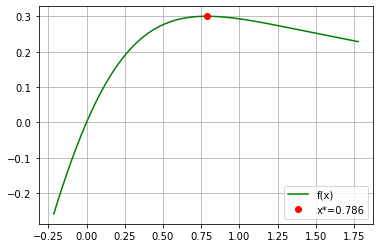

In [65]:
from math import sqrt
import matplotlib.pyplot as plt
def f(x):
    return ( (0.5/(sqrt(1+x**2))) - (sqrt(1+x**2)) * (1- (0.5/(1+x**2))) +x )

vecfunc = np.vectorize(f)
x_opt = 0.786
d = np.arange(x_opt -1,x_opt +1, 0.01)
T = vecfunc(d)
plt.plot (d, T, 'g', label = 'f(x)')
plt.plot (x_opt,f(x_opt), 'ro', label='x*={0}'.format(x_opt))
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 3. (20 points) Use the method of your choice to solve the following problem:  

$min  g(x) = e^x - x^3$

Indicate the input parameters you used and plot the function $g(x)$ in an interval containing the optimal solution.

## Plotting the function to make a first analysis of the maximum point

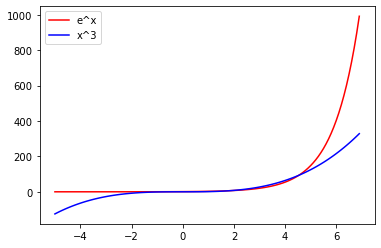

In [82]:
from math import e
x = np.arange(-5, 7.0, 0.1)
a = math.e**x
b = x**3


plt.plot(x, a, 'r', label='e^x') # plotting t, a separately 
plt.plot(x, b, 'b', label = 'x^3') # plotting t, b separately 
plt.legend(loc="upper left")
plt.show()

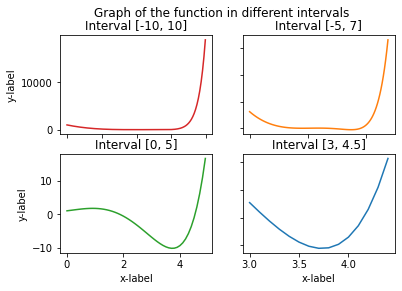

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return ( e**x - x**3 )

vecfunc = np.vectorize(f)

d1 = np.arange(-10, 10.0, 0.1); T1 = vecfunc(d1)
d2 = np.arange(-5, 7.0, 0.1); T2 = vecfunc(d2)
d3 = np.arange(0, 5.0, 0.1); T3 = vecfunc(d3)
d4 = np.arange(3, 4.5, 0.1); T4 = vecfunc(d4)



fig, axs = plt.subplots(2, 2)
fig.suptitle('Graph of the function in different intervals')

axs[0, 0].plot(d1, T1, 'tab:red'); axs[0, 0].set_title('Interval [-10, 10]')
axs[0, 1].plot(d2, T2, 'tab:orange'); axs[0, 1].set_title('Interval [-5, 7]')
axs[1, 0].plot(d3, T3, 'tab:green');  axs[1, 0].set_title('Interval [0, 5]')
axs[1, 1].plot(d4, T4, 'tab:blue');    axs[1, 1].set_title('Interval [3, 4.5]')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

The minimum is in the interval $[3.5,4]$.

### I am going to use the Newton-Raphson method, so I need to calculate the first derivative

In [72]:
from sympy import *
x = Symbol('x')

formule = 'e**x - x**3'

y = sympify(formule)
f1 = y.diff(x)
print(f1)

e**x*log(e) - 3*x**2


In [13]:
def f(x):
    return ( e**x - x**3 )
def f1(x):
    """
    First derivative of the function. 
    """
    global evalF
    evalF += 1
    
    return ( e**x - 3*x**2 )

def Bisection():    
    a, b, epsilon  = 3.5, 4, 1e-4
    """
    uncomment the next line line to enter an input from the console, 
    in the format indicated and on a single line,
    separated by a comma"""
    #a, b, epsilon = [float(i) for i in input().split(",")]
    
    if( f1(a)<0 and f1(b)>0 ):
        while( True ):        
            z = (a+b)/2
            f1_z = f1(z)
            if( f1_z< 0 ):
                a = z
            else:
                b = z
                
            if( abs(f1_z) <= epsilon ):
                break
        
        return ( print("x* = {0:.3f}\nf(x*) = {1:.3f}\nEvaluations of f'(x) = {2}".format(z, f(z), evalF)) )
    else:
        return (print ("Error") )
    
    
    
if __name__=="__main__":
    evalF = 0
    Bisection()

x* = 3.733
f(x*) = -10.216
Evaluations of f'(x) = 17


In [12]:
def f1(x):
    """
    First derivative of the function. 
    """
    global evalF
    evalF += 1
    
    return ( e**x - 3*x**2 )

def f(x):
    return ( e**x - x**3 )

def f2(x):
    
    return (e**x - 6*x)


def Newton_Raphson():
    #x1, epsilon = [float(i) for i in input().split(",")]
    
    x1, epsilon = 3.5, 1e-4
    k = 0
    x = [x1]
    f1x = f1(x[k])
    while( abs(f1x) > epsilon ):
        
        x_k_1 = x[k] - (f1x/f2(x[k]))
        x.append(x_k_1)
        k+=1
        f1x = f1(x[k])
    
    return ( print("x* = {0:.3f}\nf(x*) = {1:.3f}\nEvaluations of f'(x) = {2}".format(x_k_1, f(x_k_1), evalF)) )

    
    
    
if __name__=="__main__":
    evalF = 0
    Newton_Raphson()

x* = 3.733
f(x*) = -10.216
Evaluations of f'(x) = 5


### Graph with minimum point

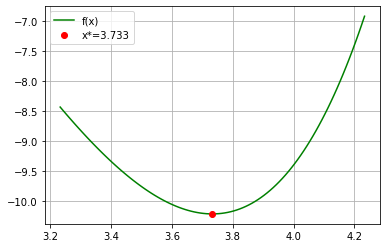

In [80]:
def f(x):
    return ( e**x - x**3 )

vecfunc = np.vectorize(f)
x_opt = 3.733
delta = .5
d = np.arange(x_opt - delta ,x_opt + delta, 0.01)
T = vecfunc(d)
plt.plot (d, T, 'g', label = 'f(x)')
plt.plot (x_opt,f(x_opt), 'ro', label='x*={0}'.format(x_opt))
plt.legend(loc="upper left")
plt.grid()
plt.show()